In [1]:
import diagonalizer
from diagonalizer import diagonalize_1D, density_plot_1D

import numpy as np
from numpy import pi
import copy
# for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
mpl.rc('text', usetex = True)

In [2]:
#Some global and default parameters
SitesCount_X = 400
fsys_1D = diagonalizer.FinalizedSystem_1D(SitesCount_X)

#The parameters with dimension of energy are measured in units of t
#The lattice parameters (apart from the number of lattice sites) seem to be the same as in Fig.1 of Baireuther et al. 16
#lBinv2 = a_0^2 / l_B^2, where a_0 is the lattice spacing, lB is the magnetic length
ParametersDefault = diagonalizer.SimpleNamespace( tp=2., t=1., tzp=1., tz=1., M0=-0.3, mu_W=10**(-4), \
                     betaz=1.2, b0=0.2, \
                     lBinv2=0., x_shift=(SitesCount_X-1.)/2., \
                     EigenvectorsCount = 50, WavefunctionComponents = 4, \
                     py=0, pz=0 )

### Let us first fix $p^y$ and vary $p^z$

In [3]:
pzMin = -1
pzMax = 1
pzCount = 30

### In absence of magnetic field

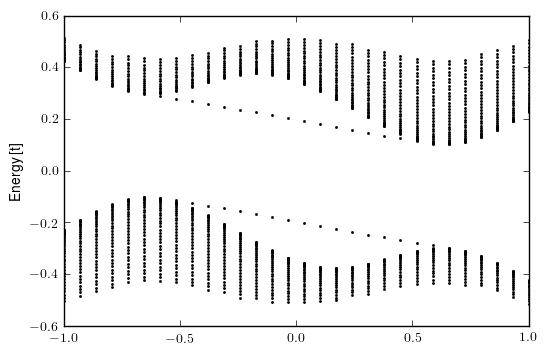

In [4]:
param = copy.copy(ParametersDefault)
param.py = 0.1

evals, evecs = diagonalizer.pSweep_1D( fsys_1D, param, pzMin, pzMax, pCount=pzCount, yORzSweep = 'pzSweep')
diagonalizer.spectrum_plot_1D(evals,pzMin,pzMax,pzCount)

### In presence of magnetic field

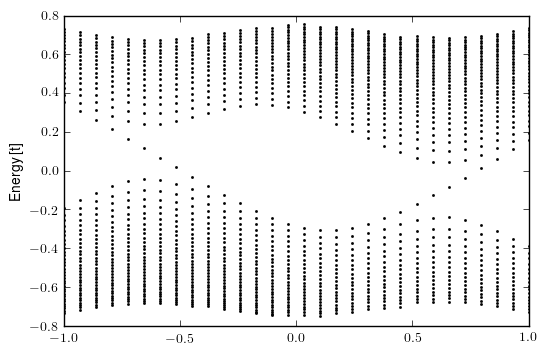

In [5]:
#lB = 20 lattice spacings
param = copy.copy(ParametersDefault)
param.py = 0.1
param.lBinv2 = 1./20.**2

evals, evecs = diagonalizer.pSweep_1D( fsys_1D, param, pzMin, pzMax, pCount=pzCount, yORzSweep = 'pzSweep')
diagonalizer.spectrum_plot_1D(evals,pzMin,pzMax,pzCount)

### Now, let us fix $p^z$ and vary $p^y$ instead

#### While we vary $p^y$ over its whole Brillouin range, we observe the expected periodicity

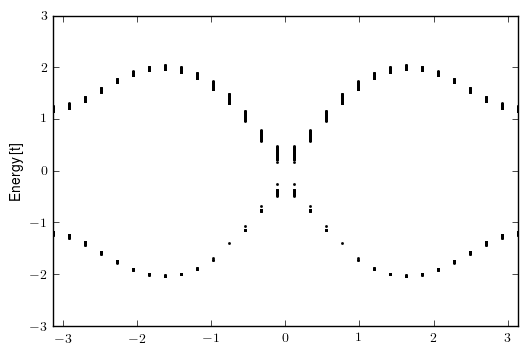

In [6]:
pyMin = -pi
pyMax = pi
pyCount = 30

param = copy.copy(ParametersDefault)
param.pz = 0.3

evals, evecs = diagonalizer.pSweep_1D( fsys_1D, param, pMin=pyMin, pMax=pyMax, pCount=pyCount, yORzSweep = 'pySweep')
diagonalizer.spectrum_plot_1D(evals,pyMin,pyMax,pyCount)

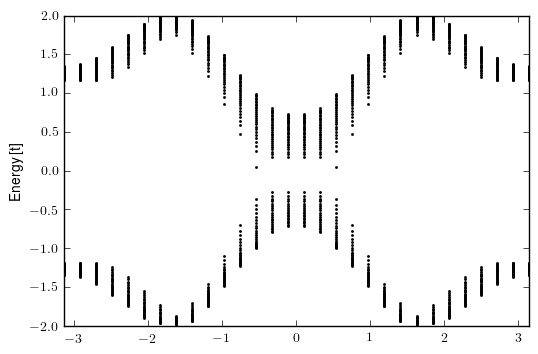

In [7]:
#lB = 20 lattice spacings
param = copy.copy(ParametersDefault)
param.pz = 0.3
param.lBinv2 = 1./20.**2

evals, evecs = diagonalizer.pSweep_1D( fsys_1D, param, pMin=pyMin, pMax=pyMax, pCount=pyCount, yORzSweep = 'pySweep')
diagonalizer.spectrum_plot_1D(evals,pyMin,pyMax,pyCount)

### The states in absence of magnetic field are quite delocalized (except of the "Fermi arc" states?)

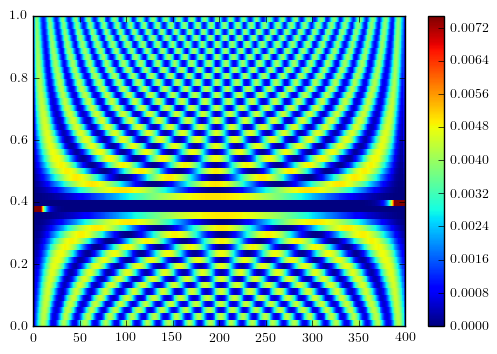

In [8]:
param = copy.copy(ParametersDefault)
param.py = 0.1
param.pz = 0.3

evals, evecs = diagonalize_1D(fsys_1D,param)
density_plot_1D(fsys_1D,param,evecs)

### While in presence of magnetic field they become localized. The lower-energy states (those who show some signs of degeneracy wrt $p^y$) are localized in the bulk

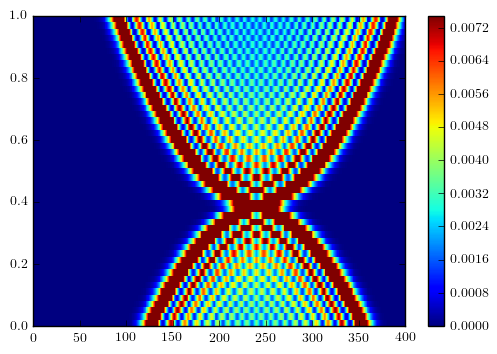

In [9]:
param = copy.copy(ParametersDefault)
param.py = 0.1
param.pz = 0.3
param.lBinv2 = 1./20.**2

evals, evecs = diagonalize_1D(fsys_1D,param)
density_plot_1D(fsys_1D,param,evecs)

### At the same time,  the high-energy states are closer to the boundary

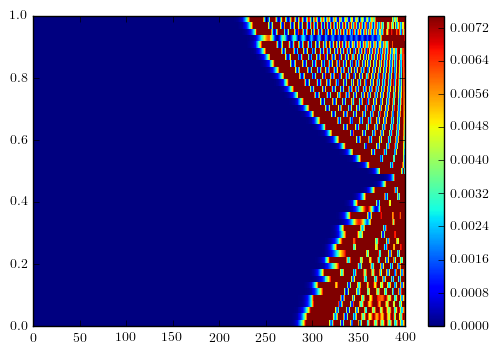

In [10]:
param = copy.copy(ParametersDefault)
param.py = 1.
param.pz = 0.3
param.lBinv2 = 1./20.**2

evals, evecs = diagonalize_1D(fsys_1D,param)
density_plot_1D(fsys_1D,param,evecs)